# RoBERTa Model Fine-tuning Documentation

## Introduction

This documentation outlines the steps for fine-tuning a RoBERTa (Robustly optimized BERT approach) model for sequence classification using PyTorch and the Hugging Face Transformers library.

## Data Preparation

1. **Dataset Path:**
   - The dataset is located at: `/content/drive/MyDrive/Colab Notebooks/dataset_summary_no-uri.csv`. Change this path in for future use.

2. **Data Loading:**
   - Load the dataset using Pandas: `pd.read_csv(dataset_path)`.

3. **Data Preprocessing:**
   - Select the first 3600 rows: `df.head(3600)`.
   - Remove stop words from the 'Content' column.

4. **Unique Labels:**
   - Determine the number of unique labels (genres) in the 'Subject1' column.

## Model Configuration

5. **GPU Availability:**
   - Check for GPU availability and set the device accordingly.

6. **Loading Pre-trained RoBERTa Model:**
   - Load the RoBERTa model for sequence classification using Hugging Face Transformers: `RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)`.

7. **Model Tokenizer:**
   - Load the RoBERTa tokenizer: `RobertaTokenizer.from_pretrained('roberta-base')`.

8. **Label Encoding:**
   - Use LabelEncoder to convert text labels to numerical labels: `label_encoder.fit_transform(df['Subject1'])`.

## Tokenization and Data Splitting

9. **Tokenization:**
   - Tokenize the text using the RoBERTa tokenizer and create a PyTorch TensorDataset.

10. **Data Splitting:**
   - Split the dataset into training and testing sets (80-20 split).

11. **Data Loader:**
   - Create DataLoaders for both the training and testing datasets.

## Model Training

12. **Optimizer and Loss Function:**
   - Use AdamW as the optimizer and CrossEntropyLoss as the loss function.

13. **Training Loop:**
   - Fine-tune the model for 50 epochs, iterating over the training DataLoader.

14. **Model Evaluation:**
   - Evaluate the model on the test set, calculating accuracy for each epoch.

## Model Saving

15. **Save Model:**
   - Save the trained RoBERTa model: `model.save_pretrained(save_path)`.

16. **Model Path Display:**
   - Display the saved model path: `print(f'Model saved at: {save_path}')`.

## Accuracy Visualization

17. **Accuracy Plotting:**
   - Plot the accuracy per epoch using Matplotlib.

## Conclusion

This documentation serves as a guide for fine-tuning a RoBERTa model for sequence classification, covering data preparation, model configuration, tokenization, training, and evaluation.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Epoch 1, Accuracy on test set: 0.025
Epoch 2, Accuracy on test set: 0.027777777777777776
Epoch 3, Accuracy on test set: 0.06944444444444445
Epoch 4, Accuracy on test set: 0.08611111111111111
Epoch 5, Accuracy on test set: 0.09722222222222222
Epoch 6, Accuracy on test set: 0.11944444444444445
Epoch 7, Accuracy on test set: 0.14027777777777778
Epoch 8, Accuracy on test set: 0.1527777777777778
Epoch 9, Accuracy on test set: 0.15694444444444444
Epoch 10, Accuracy on test set: 0.16805555555555557
Epoch 11, Accuracy on test set: 0.16944444444444445
Epoch 12, Accuracy on test set: 0.18194444444444444
Epoch 13, Accuracy on test set: 0.1736111111111111
Epoch 14, Accuracy on test set: 0.18888888888888888
Epoch 15, Accuracy on test set: 0.18333333333333332
Epoch 16, Accuracy on test set: 0.1875
Epoch 17, Accuracy on test set: 0.19722222222222222
Epoch 18, Accuracy on test set: 0.20277777777777778
Epoch 19, Accuracy on test set: 0.20277777777777778
Epoch 20, Accuracy on test set: 0.206944444444444

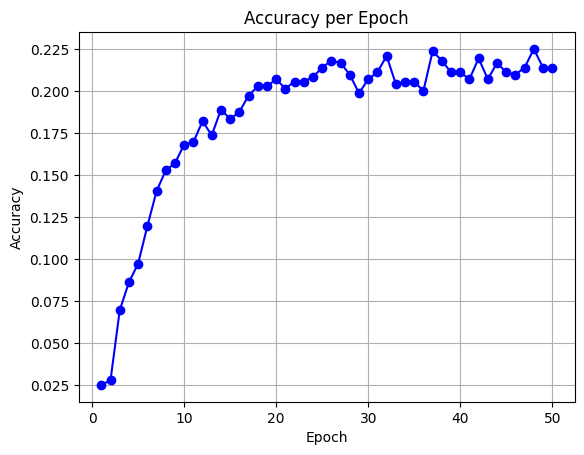

In [2]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch import nn, optim
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import torch
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Pad naar je dataset
dataset_path = r'/content/drive/MyDrive/Colab Notebooks/dataset_summary_no-uri.csv'
df = pd.read_csv(dataset_path)

df = df.head(3600)
df['Content'] = df['Content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Aantal unieke labels (genres)
num_labels = len(df['Subject1'].unique())

# Laden van het pre-trained RoBERTa-model en tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=num_labels)
model.to(device)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Label encoder voor het omzetten van tekstlabels naar numerieke labels
label_encoder = LabelEncoder()
df['Subject1_encoded'] = label_encoder.fit_transform(df['Subject1'])

# Tokenizen van de tekst
tokens = tokenizer.batch_encode_plus(
    df['Content'].astype(str).tolist(),
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

# Preprocessen van labels
labels = torch.tensor(df['Subject1_encoded'].tolist())

# Verplaatsen van de gegevens naar de GPU
tokens = {key: val.to(device) for key, val in tokens.items()}
labels = labels.to(device)

# Creëren van een DataLoader
# Verander de batchgrootte naar 16
batch_size = 16
dataset = TensorDataset(tokens['input_ids'], tokens['attention_mask'], labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Verplaatsen van het model naar de GPU
model.to(device)

# Fine-tunen van het model op de GPU
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
loss_fn = nn.CrossEntropyLoss()

accuracies = []

for epoch in range(50):
    model.train()
    for batch in train_dataloader:
        input_ids, attention_mask, label = [item.to(device) for item in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=label)
        loss = outputs.loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluatie op de testset op de GPU
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, attention_mask, label = [item.to(device) for item in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=1)
            total += label.size(0)
            correct += (predictions == label).sum().item()

    accuracy = correct / total
    accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}, Accuracy on test set: {accuracy}')

# Model opslaan
model_name = 'roberta_model'
save_directory = '/content/drive/MyDrive/AI minor/'
save_path = os.path.join(save_directory, model_name)
model.save_pretrained(save_path)

# Tonen van het opgeslagen modelpad
print(f'Model saved at: {save_path}')

# Tonen van nauwkeurigheid per epoch
import matplotlib.pyplot as plt

plt.plot(range(1, 51), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.grid(True)
plt.show()


In [3]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Lijst met vijf teksten om te classificeren
new_texts = [
    "Indo-Caribbean Feminist Thought | Bringing together three generations of scholars, thinkers and activists, this book is the first to trace a genealogy of the specific contributions Indo-Caribbean women have made to Caribbean feminist epistemology and knowledge production. ",
    "Multidisciplinary Approaches to Allergies | Allergy is an immunological disease caused by multiple factors and characterized by variability, specificity and complexity. Multidisciplinary Approaches to Allergies covers diverse aspects ranging from basic molecular mechanisms to societal issues within the framework of multidisciplinary approaches to allergies.",
    "Object Orientation with Parallelism and Persistence | Both object orientation and parallelism are modern programming paradigms which have gained much popularity in the last 10-15 years. Object orientation raises hopes for increased productivity of software generation and maintenance methods. Parallelism can serve to structure a problem but also promises faster program execution. The two areas of computing science in which these paradigms play the most prominent role are programming languages and databases. In programming languages, one can take an academic approach with a primary focus on the generality of the semantics of the language constructs which support the respective paradigm. In databases, one is willing to restrict the power of the constructs in the interest of increased efficiency.",
    "history of ancient civilizations",
    "space exploration and the search for extraterrestrial life"
]

# Lijst met ware labels voor de nieuwe teksten (vervang dit door je echte labels)
true_labels = ["Literature.", "Life sciences.", "Compilers (Computer programs)", "History", "Space"]

# Initialiseren van lege lijsten om de voorspelde en werkelijke labels op te slaan
predicted_labels = []
confidence_scores = []

# Tokenizen en classificeren van elke nieuwe tekst
for i, new_text in enumerate(new_texts):
    tokens = tokenizer.encode_plus(
        new_text,
        max_length=512,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )

    # Verplaats de tokens naar hetzelfde apparaat als het model
    tokens = {key: val.to(device) for key, val in tokens.items()}

    # Model evaluatie
    model.eval()
    with torch.no_grad():
        outputs = model(**tokens)
        probabilities = torch.nn.functional.softmax(outputs.logits, dim=1)
        predictions = torch.argmax(probabilities, dim=1)

    # Omzetting van voorspelling naar het originele label
    predicted_label = label_encoder.inverse_transform(predictions.cpu().numpy())[0]

    # Toevoegen van het voorspelde label aan de lijst
    predicted_labels.append(predicted_label)
    confidence_scores.append(probabilities[0, predictions].item())

    # Print het voorspelde label en confidence score
    print(f"For text {i + 1}: Predicted label: {predicted_label}, Confidence: {confidence_scores[-1]}")


For text 1: Predicted label: Sex., Confidence: 0.0686507299542427
For text 2: Predicted label: Internal medicine., Confidence: 0.36570027470588684
For text 3: Predicted label: Compilers (Computer programs)., Confidence: 0.8402687311172485
For text 4: Predicted label: Cultural property., Confidence: 0.011632055975496769
For text 5: Predicted label: Solar system., Confidence: 0.04572697728872299
